<a href="https://colab.research.google.com/github/Degananda264/Automated-Machine-Learning-/blob/master/Using_H20_AutoML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Tue Jun 16 07:07:26 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   70C    P8    34W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
default-jre set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 43 not upgraded.
openjdk version "11.0.7" 2020-04-14
OpenJDK Runtime Environment (build 11.0.7+10-post-Ubuntu-2ubuntu218.04)
OpenJDK 64-Bit Server VM (build 11.0.7+10-post-Ubuntu-2ubuntu218.04, mixed mode, sharing)


In [3]:
!pip install h2o

     |████████████████████████████████| 128.3MB 94kB/s 
  Created wheel for h2o: filename=h2o-3.30.0.4-py2.py3-none-any.whl size=128397038 sha256=2773096e75bfbdecdae8fba1b4d9cd5c5296a338aa7134440609e663408f4492
  Stored in directory: /root/.cache/pip/wheels/ad/bd/cc/0a8c7dffc4772df0bbfae4c1c7a9d64525fcd3ada9694dd8c3
Successfully built h2o


In [0]:
import h2o

In [6]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.7" 2020-04-14; OpenJDK Runtime Environment (build 11.0.7+10-post-Ubuntu-2ubuntu218.04); OpenJDK 64-Bit Server VM (build 11.0.7+10-post-Ubuntu-2ubuntu218.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpacvi36wi
  JVM stdout: /tmp/tmpacvi36wi/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpacvi36wi/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.4
H2O_cluster_version_age:,"14 days, 15 hours and 53 minutes"
H2O_cluster_name:,H2O_from_python_unknownUser_u293ol
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.180 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [0]:
from h2o.automl import H2OAutoML

In [8]:
churn_df = h2o.import_file('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [10]:
churn_df.head()

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.1,1949.4,No
6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.8,3046.05,Yes
6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [0]:
churn_train,churn_test,churn_valid = churn_df.split_frame(ratios=[.7, .15])

In [0]:
y = "Churn"
x = churn_df.columns
x.remove(y)
x.remove("customerID")

In [0]:
aml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = ["StackedEnsemble", "DeepLearning"], verbosity="info", nfolds=0)

In [14]:
aml.train(x = x, y = y, training_frame = churn_train, validation_frame=churn_valid)

AutoML progress: |
07:11:55.390: Project: AutoML_20200616_71155382
07:11:55.391: Cross-validation disabled by user: no fold column nor nfolds > 1.
07:11:55.391: Setting stopping tolerance adaptively based on the training frame: 0.014237850952891042
07:11:55.391: Build control seed: 10
07:11:55.392: Since cross-validation is disabled, and no leaderboard frame was provided, automatically split the training data into training and leaderboard frames in the ratio 90/10
07:11:55.498: training frame: Frame key: automl_training_py_3_sid_98c7    cols: 21    rows: 4458  chunks: 8    size: 295095  checksum: 59831502258393990
07:11:55.498: validation frame: Frame key: py_5_sid_98c7    cols: 21    rows: 1085  chunks: 8    size: 139908  checksum: 5421992353375106207
07:11:55.509: leaderboard frame: Frame key: automl_leaderboard_py_3_sid_98c7    cols: 21    rows: 475  chunks: 8    size: 124335  checksum: -7373211550771182779
07:11:55.509: blending frame: NULL
07:11:55.509: response column: Churn
07:1

In [0]:
lb = aml.leaderboard

In [16]:
lb

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_5_AutoML_20200616_071155,0.851055,0.414566,0.680845,0.22512,0.368837,0.136041
GBM_2_AutoML_20200616_071155,0.846048,0.421027,0.671839,0.223215,0.3709,0.137567
GBM_1_AutoML_20200616_071155,0.844065,0.424355,0.668243,0.217368,0.374256,0.140067
GLM_1_AutoML_20200616_071155,0.84178,0.42421,0.666982,0.222162,0.371857,0.138278
XGBoost_3_AutoML_20200616_071155,0.839327,0.430177,0.666701,0.22354,0.375172,0.140754
GBM_4_AutoML_20200616_071155,0.839147,0.432769,0.661664,0.22512,0.374383,0.140162
GBM_3_AutoML_20200616_071155,0.838341,0.433108,0.651967,0.236748,0.377599,0.142581
XGBoost_1_AutoML_20200616_071155,0.832818,0.444979,0.653345,0.236221,0.378637,0.143366
XGBoost_2_AutoML_20200616_071155,0.831586,0.442269,0.643343,0.261325,0.38017,0.14453
DRF_1_AutoML_20200616_071155,0.829648,0.442746,0.636083,0.245093,0.378047,0.14292


In [17]:
churn_pred=aml.leader.predict(churn_test)


gbm prediction progress: |████████████████████████████████████████████████| 100%


In [18]:
churn_pred.head()

predict,No,Yes
Yes,0.573945,0.426055
Yes,0.417343,0.582657
No,0.870984,0.129016
Yes,0.452065,0.547935
No,0.965354,0.0346458
No,0.963786,0.0362138
No,0.95397,0.0460295
No,0.908554,0.0914463
Yes,0.77292,0.22708
No,0.97621,0.02379


In [19]:
aml.leader.model_performance(churn_test)


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.13138827002553305
RMSE: 0.36247519918683135
LogLoss: 0.39799043558742475
Mean Per-Class Error: 0.2173025802179993
AUC: 0.8595579733776052
AUCPR: 0.6585694894527799
Gini: 0.7191159467552104

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.25620293861635096: 


,,No,Yes,Error,Rate
0,No,562.0,196.0,0.2586,(196.0/758.0)
1,Yes,47.0,220.0,0.176,(47.0/267.0)
2,Total,609.0,416.0,0.2371,(243.0/1025.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.256203,0.644217,233.0
1,max f2,0.144645,0.770171,291.0
2,max f0point5,0.425879,0.621891,170.0
3,max accuracy,0.425879,0.802927,170.0
4,max precision,0.896848,1.000000,0.0
5,max recall,0.050216,1.000000,355.0
6,max specificity,0.896848,1.000000,0.0
7,max absolute_mcc,0.256203,0.505344,233.0
8,max min_per_class_accuracy,0.295788,0.771536,215.0
9,max mean_per_class_accuracy,0.256203,0.782697,233.0



Gains/Lift Table: Avg response rate: 26.05 %, avg score: 27.41 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010732,0.870399,3.140960,3.140960,0.818182,0.881044,0.818182,0.881044,0.033708,0.033708,214.096016,214.096016
1,,2,0.020488,0.835625,3.838951,3.473337,1.000000,0.850476,0.904762,0.866488,0.037453,0.071161,283.895131,247.333690
2,,3,0.030244,0.808699,3.838951,3.591277,1.000000,0.819499,0.935484,0.851330,0.037453,0.108614,283.895131,259.127703
3,,4,0.040000,0.793424,2.687266,3.370787,0.700000,0.803110,0.878049,0.839569,0.026217,0.134831,168.726592,237.078652
4,,5,0.050732,0.786694,3.140960,3.322169,0.818182,0.790681,0.865385,0.829227,0.033708,0.168539,214.096016,232.216940
5,,6,0.100488,0.686560,2.182933,2.758082,0.568627,0.735702,0.718447,0.782919,0.108614,0.277154,118.293310,175.808152
6,,7,0.150244,0.608885,2.032386,2.517754,0.529412,0.642566,0.655844,0.736438,0.101124,0.378277,103.238599,151.775378
7,,8,0.200000,0.540685,2.258207,2.453184,0.588235,0.575215,0.639024,0.696329,0.112360,0.490637,125.820665,145.318352
8,,9,0.300488,0.380741,1.938111,2.280935,0.504854,0.469033,0.594156,0.620318,0.194757,0.685393,93.811134,128.093536
9,,10,0.400000,0.262126,1.317287,2.041199,0.343137,0.316837,0.531707,0.544818,0.131086,0.816479,31.728721,104.119850


In [0]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])



In [21]:
model_ids

['GBM_5_AutoML_20200616_071155',
 'GBM_2_AutoML_20200616_071155',
 'GBM_1_AutoML_20200616_071155',
 'GLM_1_AutoML_20200616_071155',
 'XGBoost_3_AutoML_20200616_071155',
 'GBM_4_AutoML_20200616_071155',
 'GBM_3_AutoML_20200616_071155',
 'XGBoost_1_AutoML_20200616_071155',
 'XGBoost_2_AutoML_20200616_071155',
 'DRF_1_AutoML_20200616_071155']

In [22]:
h2o.get_model([mid for mid in model_ids if "GBM" in mid][0])

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_5_AutoML_20200616_071155


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,40.0,40.0,15710.0,6.0,13.0,7.95,25.0,30.0,26.525




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.1192813947616
RMSE: 0.34537138671522866
LogLoss: 0.3719502895031531
Mean Per-Class Error: 0.19401845117447492
AUC: 0.8856491863589161
AUCPR: 0.7346489214827269
Gini: 0.7712983727178322

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2808323547979883: 


,,No,Yes,Error,Rate
0,No,2555.0,710.0,0.2175,(710.0/3265.0)
1,Yes,204.0,989.0,0.171,(204.0/1193.0)
2,Total,2759.0,1699.0,0.205,(914.0/4458.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.280832,0.683956,235.0
1,max f2,0.196976,0.789321,274.0
2,max f0point5,0.531009,0.696463,133.0
3,max accuracy,0.519567,0.829296,137.0
4,max precision,0.896848,1.000000,0.0
5,max recall,0.024198,1.000000,384.0
6,max specificity,0.896848,1.000000,0.0
7,max absolute_mcc,0.280832,0.557465,235.0
8,max min_per_class_accuracy,0.302211,0.797243,226.0
9,max mean_per_class_accuracy,0.240264,0.805982,253.0



Gains/Lift Table: Avg response rate: 26.76 %, avg score: 26.91 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010094,0.858169,3.570718,3.570718,0.955556,0.873420,0.955556,0.873420,0.036044,0.036044,257.071808,257.071808
1,,2,0.020188,0.836543,3.321598,3.446158,0.888889,0.848516,0.922222,0.860968,0.033529,0.069573,232.159821,244.615814
2,,3,0.030058,0.812640,3.312162,3.402159,0.886364,0.822093,0.910448,0.848203,0.032691,0.102263,231.216185,240.215936
3,,4,0.040825,0.793221,3.269698,3.367225,0.875000,0.800690,0.901099,0.835672,0.035205,0.137469,226.969824,236.722456
4,,5,0.050022,0.778258,3.463374,3.384902,0.926829,0.786121,0.905830,0.826562,0.031852,0.169321,246.337375,238.490221
5,,6,0.100045,0.681044,2.865437,3.125170,0.766816,0.725950,0.836323,0.776256,0.143336,0.312657,186.543702,212.516962
6,,7,0.150067,0.601613,2.614083,2.954807,0.699552,0.641366,0.790732,0.731292,0.130763,0.443420,161.408290,195.480738
7,,8,0.200090,0.517667,2.228673,2.773274,0.596413,0.560873,0.742152,0.688688,0.111484,0.554904,122.867324,177.327384
8,,9,0.300135,0.376397,1.600288,2.382279,0.428251,0.449226,0.637519,0.608867,0.160101,0.715004,60.028793,138.227854
9,,10,0.399955,0.259270,1.293184,2.110463,0.346067,0.315519,0.564778,0.535653,0.129086,0.844091,29.318402,111.046303




ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.14030592550166734
RMSE: 0.37457432573745275
LogLoss: 0.4324864024959282
Mean Per-Class Error: 0.23454968944099375
AUC: 0.8257275953859805
AUCPR: 0.6309189710899884
Gini: 0.651455190771961

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.21831788979278174: 


,,No,Yes,Error,Rate
0,No,551.0,254.0,0.3155,(254.0/805.0)
1,Yes,43.0,237.0,0.1536,(43.0/280.0)
2,Total,594.0,491.0,0.2737,(297.0/1085.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.218318,0.614786,252.0
1,max f2,0.203871,0.736648,260.0
2,max f0point5,0.547396,0.611213,115.0
3,max accuracy,0.555669,0.800922,111.0
4,max precision,0.893525,1.000000,0.0
5,max recall,0.011950,1.000000,398.0
6,max specificity,0.893525,1.000000,0.0
7,max absolute_mcc,0.218318,0.466720,252.0
8,max min_per_class_accuracy,0.279398,0.742857,218.0
9,max mean_per_class_accuracy,0.218318,0.765450,252.0



Gains/Lift Table: Avg response rate: 25.81 %, avg score: 26.70 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010138,0.849189,3.170455,3.170455,0.818182,0.876125,0.818182,0.876125,0.032143,0.032143,217.045455,217.045455
1,,2,0.020276,0.818739,3.522727,3.346591,0.909091,0.834139,0.863636,0.855132,0.035714,0.067857,252.272727,234.659091
2,,3,0.030415,0.805574,3.522727,3.405303,0.909091,0.813500,0.878788,0.841255,0.035714,0.103571,252.272727,240.530303
3,,4,0.040553,0.792647,3.875000,3.522727,1.000000,0.800907,0.909091,0.831168,0.039286,0.142857,287.500000,252.272727
4,,5,0.050691,0.769822,2.818182,3.381818,0.727273,0.781980,0.872727,0.821330,0.028571,0.171429,181.818182,238.181818
5,,6,0.100461,0.692894,2.081019,2.737385,0.537037,0.724769,0.706422,0.773492,0.103571,0.275000,108.101852,173.738532
6,,7,0.150230,0.597902,2.439815,2.638804,0.629630,0.640999,0.680982,0.729599,0.121429,0.396429,143.981481,163.880368
7,,8,0.200000,0.522577,2.009259,2.482143,0.518519,0.560391,0.640553,0.687492,0.100000,0.496429,100.925926,148.214286
8,,9,0.300461,0.365376,1.386468,2.115798,0.357798,0.435987,0.546012,0.603400,0.139286,0.635714,38.646789,111.579755
9,,10,0.400000,0.263448,1.219907,1.892857,0.314815,0.309636,0.488479,0.530297,0.121429,0.757143,21.990741,89.285714




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-06-16 07:12:20,0.001 sec,0.0,0.442712,0.580866,0.500000,0.267609,1.000000,0.732391,0.437674,0.571257,0.500000,0.258065,1.000000,0.741935
1,,2020-06-16 07:12:20,0.164 sec,5.0,0.394325,0.480883,0.860388,0.684979,3.355492,0.215568,0.396808,0.486777,0.822866,0.626426,3.358333,0.229493
2,,2020-06-16 07:12:20,0.305 sec,10.0,0.372668,0.436558,0.866177,0.696082,3.347548,0.224764,0.381679,0.454506,0.823363,0.632259,3.522727,0.234101
3,,2020-06-16 07:12:20,0.472 sec,15.0,0.362327,0.413023,0.869469,0.702357,3.321598,0.214670,0.376042,0.439713,0.824998,0.628751,3.170455,0.230415
4,,2020-06-16 07:12:21,0.649 sec,20.0,0.356421,0.398740,0.873002,0.710768,3.404638,0.217362,0.374131,0.433265,0.826675,0.631098,3.522727,0.282949
5,,2020-06-16 07:12:21,0.864 sec,25.0,0.353035,0.390086,0.875951,0.715565,3.339266,0.196276,0.373701,0.430909,0.826750,0.631638,3.522727,0.279263
6,,2020-06-16 07:12:21,1.038 sec,30.0,0.350051,0.382710,0.879521,0.722795,3.404638,0.197847,0.374269,0.431545,0.825648,0.629889,3.170455,0.281106
7,,2020-06-16 07:12:21,1.239 sec,35.0,0.347495,0.376897,0.882591,0.730246,3.487678,0.197398,0.374244,0.431741,0.825672,0.633407,3.170455,0.282028
8,,2020-06-16 07:12:21,1.455 sec,40.0,0.345371,0.371950,0.885649,0.734649,3.570718,0.205025,0.374574,0.432486,0.825728,0.630919,3.170455,0.273733



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Contract,618.294250,1.000000,0.367272
1,tenure,209.097870,0.338185,0.124206
2,TotalCharges,156.389740,0.252937,0.092897
3,TechSupport,144.753586,0.234118,0.085985
4,InternetService,123.738983,0.200130,0.073502
5,MonthlyCharges,115.930748,0.187501,0.068864
6,PaymentMethod,76.739037,0.124114,0.045584
7,OnlineSecurity,63.717487,0.103054,0.037849
8,MultipleLines,30.850510,0.049896,0.018325
9,PaperlessBilling,29.199234,0.047225,0.017345


In [0]:
out=h2o.get_model([mid for mid in model_ids if "GBM" in mid][0])

In [26]:
out.params

{'balance_classes': {'actual': False, 'default': False},
 'build_tree_one_node': {'actual': False, 'default': False},
 'calibrate_model': {'actual': False, 'default': False},
 'calibration_frame': {'actual': None, 'default': None},
 'categorical_encoding': {'actual': 'AUTO', 'default': 'AUTO'},
 'check_constant_response': {'actual': True, 'default': True},
 'checkpoint': {'actual': None, 'default': None},
 'class_sampling_factors': {'actual': None, 'default': None},
 'col_sample_rate': {'actual': 0.8, 'default': 1.0},
 'col_sample_rate_change_per_level': {'actual': 1.0, 'default': 1.0},
 'col_sample_rate_per_tree': {'actual': 0.8, 'default': 1.0},
 'custom_distribution_func': {'actual': None, 'default': None},
 'custom_metric_func': {'actual': None, 'default': None},
 'distribution': {'actual': 'bernoulli', 'default': 'AUTO'},
 'export_checkpoints_dir': {'actual': None, 'default': None},
 'fold_assignment': {'actual': 'AUTO', 'default': 'AUTO'},
 'fold_column': {'actual': None, 'defaul

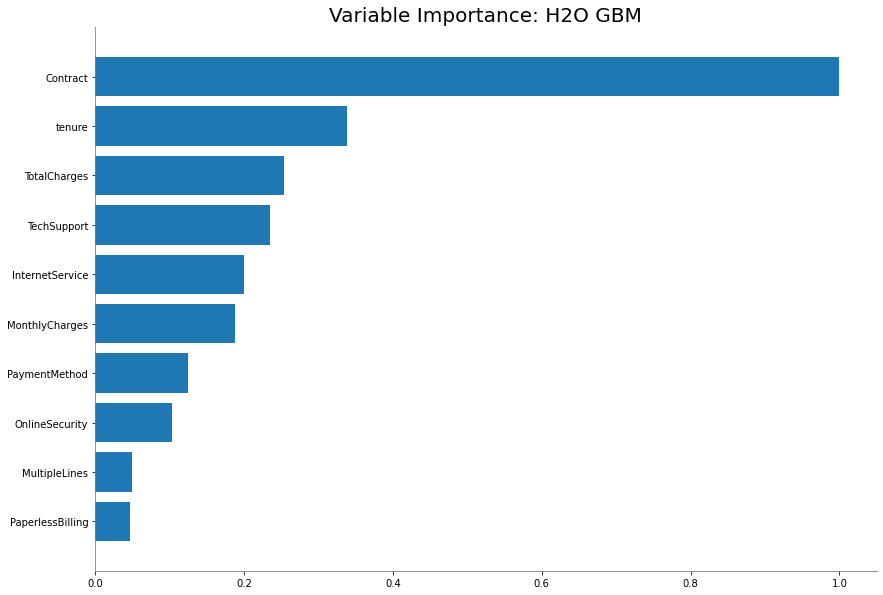

In [27]:
out.varimp_plot()

In [28]:
aml.leader.download_mojo(path = "./")

'/content/GBM_5_AutoML_20200616_071155.zip'